In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


demand_data = pd.read_csv('demand.csv')
prices_data = pd.read_csv('prices.csv')
households_data = pd.read_csv('households.csv')
temp_data = pd.read_csv('Temperaturer.csv', sep=';')

!pip install --user linearmodels


In [2]:
print(df_demand.head())
print(df_demand.shape)

print(df_households.head())
print(df_households.shape)

print(df_prices.head())
print(df_prices.shape)

print(df_temperature.head())
print(df_temperature.shape)

day = [0,1,2,3,4,5,6]
hour = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

df_households = df_households[df_households['Demand_data'] != 'No']        #removes the columns where there is no demand data

# Merge df1 and df2 on 'ID'
df_merged1 = pd.merge(df_demand, df_households[['ID', 'Price_area']], on='ID', how='left')
df_merged2 = pd.merge(df_merged1, df_prices[['Price_area', 'Date', 'Hour', 'Price_NOK_MWh', 'Price_NOK_kWh']],
                on=['Price_area', 'Date', 'Hour'], how='left')

filtered_rows = df_merged2[df_merged2['ID'] == 23].head(5)

print(filtered_rows)

   ID        Date  Hour  Demand_kWh
0  18  2020-10-01     1       0.893
1  18  2020-10-01     2       0.804
2  18  2020-10-01     3       0.335
3  18  2020-10-01     4       0.231
4  18  2020-10-01     5       0.725
(14913408, 4)
   ID       City     Region Price_area Demand_data
0  18       Oslo       Oslo        NO1         Yes
1  19  Trondheim  Trondheim        NO3          No
2  20     Bergen     Bergen        NO5          No
3  23     Bergen     Bergen        NO5         Yes
4  24  Trondheim  Trondheim        NO3          No
(4446, 5)
  Price_area        Date  Hour  Price_NOK_MWh  Price_NOK_kWh
0        NO1  2019-07-01     1         265.80           0.27
1        NO1  2019-07-01     2         245.50           0.25
2        NO1  2019-07-01     3         234.18           0.23
3        NO1  2019-07-01     4         232.73           0.23
4        NO1  2019-07-01     5         242.40           0.24
(135240, 5)
                                              Sted;Tidspunkt_UTC;Temperatur;

In [3]:
# Load the data
demand_data = pd.read_csv('demand.csv')
prices_data = pd.read_csv('prices.csv')
households_data = pd.read_csv('households.csv')

households_data = df_households[df_households['Demand_data'] != 'No'] 

# Merge the data
merged_data = pd.merge(demand_data, households_data[['ID', 'Price_area']], on='ID', how='left')
merged_data = pd.merge(merged_data, prices_data[['Price_area', 'Date', 'Hour', 'Price_NOK_MWh', 'Price_NOK_kWh']],
                       on=['Price_area', 'Date', 'Hour'], how='left')

# Convert Date to datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Create the Day_of_week column
merged_data['Day_of_week'] = merged_data['Date'].dt.dayofweek

# Create the Hour_of_day and Hour_of_week columns
merged_data['Hour_of_day'] = merged_data['Hour']
merged_data['Hour_of_week'] = merged_data['Day_of_week'] * 24 + merged_data['Hour_of_day']

# Select a subset of 5 households
household_ids = [18, 23]  # Replace with actual household IDs from your dataset
subset_data = merged_data[merged_data['ID'].isin(household_ids)]

# Define the regression formula
formula = (
    'Demand_kWh ~ Price_NOK_kWh + '
    'C(Day_of_week) + C(Hour_of_day)'
)

# Fit the model on the subset
model = smf.ols(formula, data=merged_data).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Demand_kWh   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     6681.
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:00:00   Log-Likelihood:            -2.8095e+07
No. Observations:            14913408   AIC:                         5.619e+07
Df Residuals:                14913377   BIC:                         5.619e+07
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.4561 

In [4]:
print("\n=== Initial Data Shapes ===")
print(f"Demand data shape: {demand_data.shape}")
print(f"Prices data shape: {prices_data.shape}")
print(f"Households data shape: {households_data.shape}")
print(f"Temperature data shape: {temp_data.shape}")



# Clean column names and data
temp_data.columns = ['City', 'Timestamp_UTC', 'Temperature', 'Temperature24', 'Temperature48', 'Temperature72']

# Convert timestamp to datetime
temp_data['Timestamp_UTC'] = pd.to_datetime(temp_data['Timestamp_UTC'])

# Create Date and Hour columns to match with demand data
temp_data['Date'] = pd.to_datetime(temp_data['Timestamp_UTC'].dt.date)
temp_data['Hour'] = temp_data['Timestamp_UTC'].dt.hour

# Create mapping dictionary for cities to price areas
city_to_area = {
    'Oslo': 'NO1',
    'Sarpsborg': 'NO1',
    'Moss': 'NO1',
    'Stavanger': 'NO2',
    'Bergen': 'NO5',
    'Trondheim': 'NO3',
    'Tromso': 'NO4',
    'Tromsø': 'NO4',
    'Evenes': 'NO4',
    'Kristiansand': 'NO2'
}

# Print unique cities in temperature data
print("\n=== Unique cities in temperature data ===")
print(temp_data['City'].unique())

# Add price area column based on city
temp_data['Price_area'] = temp_data['City'].map(city_to_area)

# Print mapping success
print("\n=== Price area mapping success ===")
print("Rows with successfully mapped price areas:", temp_data['Price_area'].notna().sum())
print("Total rows:", len(temp_data))
print("Unique price areas in temperature data:", temp_data['Price_area'].unique())

# Select relevant columns for merging
temp_data = temp_data[['Date', 'Hour', 'Price_area', 'Temperature']]

# Convert temperature to numeric, replacing any comma with period
temp_data['Temperature'] = temp_data['Temperature'].str.replace(',', '.').astype(float)

print("\n=== Temperature Data Statistics ===")
print(temp_data['Temperature'].describe())

# First merge
merged_data = pd.merge(demand_data, households_data[['ID', 'Price_area']], on='ID', how='left')
print("\n=== After first merge ===")
print(f"Shape after merging with households: {merged_data.shape}")
print(f"Number of duplicate rows after merge: {merged_data.duplicated().sum()}")

# Second merge
merged_data = pd.merge(merged_data, prices_data[['Price_area', 'Date', 'Hour', 'Price_NOK_MWh', 'Price_NOK_kWh']],
                      on=['Price_area', 'Date', 'Hour'], how='left')
print("\n=== After second merge ===")
print(f"Shape after merging with prices: {merged_data.shape}")
print(f"Number of duplicate rows after merge: {merged_data.duplicated().sum()}")

# Ensure Date is datetime in merged_data
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Print date ranges before final merge
print("\n=== Date Ranges ===")
print("Temperature data date range:", 
      temp_data['Date'].min(), "to", temp_data['Date'].max())
print("Merged data date range:",
      merged_data['Date'].min(), "to", merged_data['Date'].max())

# Print unique price areas before final merge
print("\n=== Price Areas Before Final Merge ===")
print("Price areas in merged data:", merged_data['Price_area'].unique())
print("Price areas in temperature data:", temp_data['Price_area'].unique())

# Final merge with temperature data
merged_data = pd.merge(merged_data, temp_data,
                      on=['Price_area', 'Date', 'Hour'],
                      how='left')

print("\n=== After final merge ===")
print(f"Shape after merging with temperature: {merged_data.shape}")
print(f"Number of duplicate rows after merge: {merged_data.duplicated().sum()}")

# Drop duplicates - FIXED
print("\n=== Removing duplicates ===")
prev_shape = merged_data.shape
merged_data = merged_data.drop_duplicates()
print(f"Rows removed: {prev_shape[0] - merged_data.shape[0]}")
print(f"Shape after removing duplicates: {merged_data.shape}")

# Create the Day_of_week and Hour_of_day columns
merged_data['Day_of_week'] = merged_data['Date'].dt.dayofweek
merged_data['Hour_of_day'] = merged_data['Hour']

# Initialize a list to store results
price_responses = []

# Group the data by household ID
grouped = merged_data.groupby('ID')

# Iterate over each household
for household_id, group in grouped:
    # Create feature matrix and target variable
    X = group[['Price_NOK_kWh', 'Temperature', 'Hour_of_day', 'Day_of_week']] # use average temperature, covid data, maybe add hour of the week
    y = group['Demand_kWh']
    
    # Remove rows with missing values
    mask = ~(X.isnull().any(axis=1) | y.isnull())
    X = X[mask]
    y = y[mask]
    
    # Check if we have enough data points after removing missing values
    if len(X) < 10:  # Minimum number of observations
        print(f"Skipping household {household_id}: insufficient data points after removing missing values")
        continue
        
    # Add constant term
    X = sm.add_constant(X)
    
    try:
        # Fit the regression model
        model = sm.OLS(y, X).fit()
        
        # Extract the coefficients
        price_response = model.params['Price_NOK_kWh']
        temp_response = model.params['Temperature']
        
        # Compute price elasticity
        avg_price = group['Price_NOK_kWh'].mean()
        avg_demand = group['Demand_kWh'].mean()
    
        if avg_demand != 0:  # Avoid division by zero
            price_elasticity = (price_response * avg_price) / avg_demand
        else:
            price_elasticity = None  # Handle edge cases where demand is 0
        
        # Store the results
        price_responses.append({
            'ID': household_id,
            'Price_Response': price_response,
            'Temperature_Response': temp_response,
            'N_Observations': len(X),
            'R_squared': model.rsquared,
            'Price_elasticity': price_elasticity
        })
        
    except Exception as e:
        print(f"Error processing household {household_id}: {str(e)}")
        continue

# Convert results into a DataFrame
results_df = pd.DataFrame(price_responses)

# Display summary statistics of the results
print("\n=== Summary Statistics of Results ===")
print(results_df.describe())

# Calculate and print the percentage of households with positive price response
pos_price_response = (results_df['Price_Response'] > 0).mean() * 100
print(f"\nPercentage of households with positive price response: {pos_price_response:.2f}%")

# Print temperature response statistics
print("\n=== Temperature Response Statistics ===")
print(results_df['Temperature_Response'].describe())

# Display the final DataFrame
print("\n=== Final Results ===")
print(results_df.head())

# Price elasticity
print(results_df['Price_elasticity'])


=== Initial Data Shapes ===
Demand data shape: (14913408, 4)
Prices data shape: (135240, 5)
Households data shape: (4446, 5)

=== First few rows of raw temperature data ===
     Sted        Tidspunkt_UTC Temperatur Temperatur24 Temperatur48  \
0  Bergen  2010-01-04 00:00:00       -4,0         -6,1         -8,0   
1  Bergen  2010-01-04 01:00:00       -3,9         -5,8         -7,9   
2  Bergen  2010-01-04 02:00:00       -3,9         -5,6         -7,8   
3  Bergen  2010-01-04 03:00:00       -3,6         -5,4         -7,7   
4  Bergen  2010-01-04 04:00:00       -2,7         -5,1         -7,6   

  Temperatur72  
0         -7,4  
1         -7,4  
2         -7,4  
3         -7,3  
4         -7,3  

=== Unique cities in temperature data ===
['Bergen' 'Evenes' 'Kristiansand' 'Moss' 'Oslo' 'Sarpsborg' 'Stavanger'
 'Tromso' 'Trondheim']

=== Price area mapping success ===
Rows with successfully mapped price areas: 1115472
Total rows: 1115472
Unique price areas in temperature data: ['NO5' 'NO4'

<Figure size 1008x720 with 0 Axes>

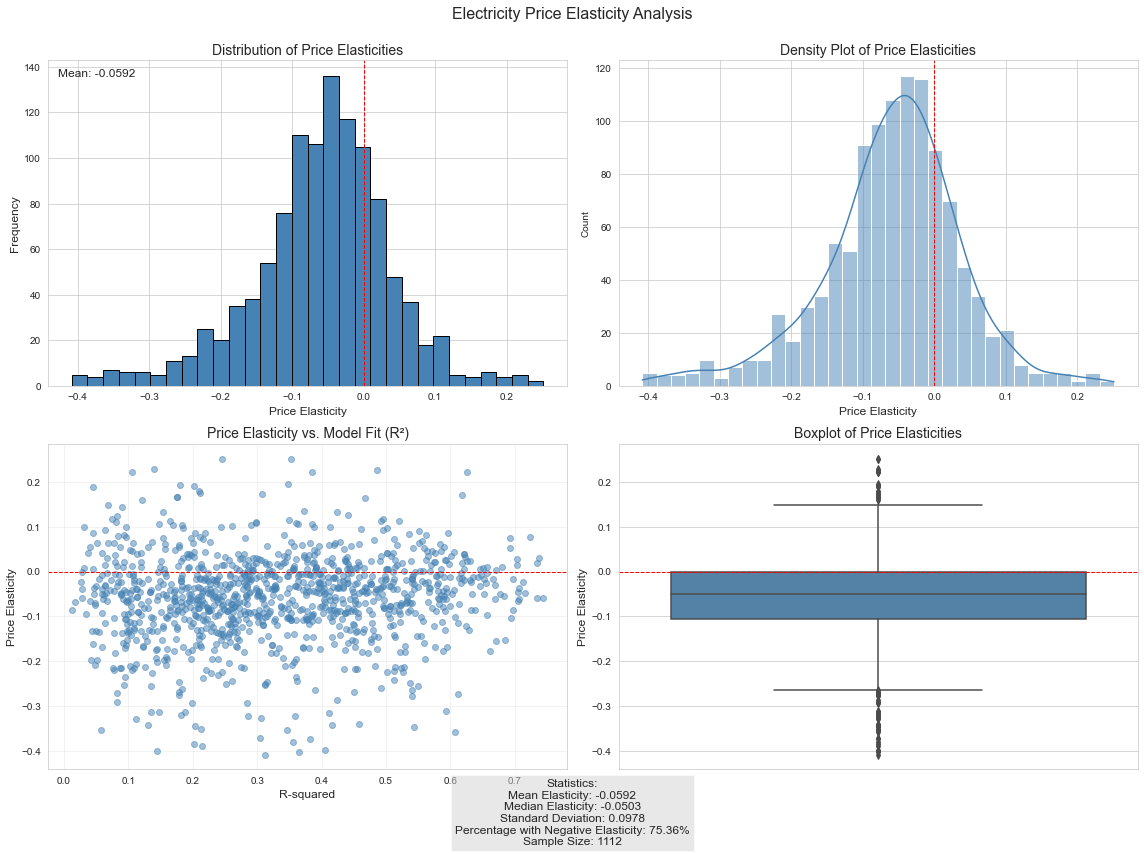

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

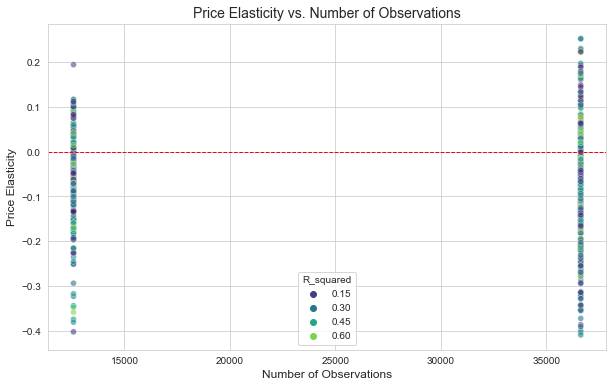

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming results_df is the DataFrame with your elasticity results
# If you're loading from a saved file, uncomment and modify the following line:
# results_df = pd.read_csv('elasticity_results.csv')

# Filter out extreme values for better visualization
def filter_for_visualization(df, column, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = df[column].quantile(lower_quantile)
    upper_bound = df[column].quantile(upper_quantile)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Clean data - remove NaN and infinite values
results_clean = results_df.copy()
results_clean = results_clean[~results_clean['Price_elasticity'].isna()]
results_clean = results_clean[~np.isinf(results_clean['Price_elasticity'])]

# Filter extreme outliers for better visualization
results_filtered = filter_for_visualization(results_clean, 'Price_elasticity')

# Set up the visualization environment
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# Create a multi-chart figure
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram of price elasticities
axs[0, 0].hist(results_filtered['Price_elasticity'], bins=30, color='steelblue', edgecolor='black')
axs[0, 0].set_title('Distribution of Price Elasticities', fontsize=14)
axs[0, 0].set_xlabel('Price Elasticity', fontsize=12)
axs[0, 0].set_ylabel('Frequency', fontsize=12)
axs[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=1)
axs[0, 0].text(0.02, 0.95, f'Mean: {results_filtered["Price_elasticity"].mean():.4f}', 
              transform=axs[0, 0].transAxes, fontsize=12)

# 2. Histogram with density plot overlay
sns.histplot(results_filtered['Price_elasticity'], kde=True, ax=axs[0, 1], color='steelblue')
axs[0, 1].set_title('Density Plot of Price Elasticities', fontsize=14)
axs[0, 1].set_xlabel('Price Elasticity', fontsize=12)
axs[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=1)

# 3. Scatterplot of R-squared vs Price Elasticity
axs[1, 0].scatter(results_filtered['R_squared'], results_filtered['Price_elasticity'], 
                 alpha=0.5, color='steelblue')
axs[1, 0].set_title('Price Elasticity vs. Model Fit (R²)', fontsize=14)
axs[1, 0].set_xlabel('R-squared', fontsize=12)
axs[1, 0].set_ylabel('Price Elasticity', fontsize=12)
axs[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=1)
axs[1, 0].grid(True, alpha=0.3)

# 4. Boxplot of price elasticities
sns.boxplot(y=results_filtered['Price_elasticity'], ax=axs[1, 1], color='steelblue')
axs[1, 1].set_title('Boxplot of Price Elasticities', fontsize=14)
axs[1, 1].set_ylabel('Price Elasticity', fontsize=12)
axs[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=1)

# Calculate statistics for annotations
elasticity_stats = {
    'Mean': results_filtered['Price_elasticity'].mean(),
    'Median': results_filtered['Price_elasticity'].median(),
    'Std Dev': results_filtered['Price_elasticity'].std(),
    'Negative %': (results_filtered['Price_elasticity'] < 0).mean() * 100,
    'Sample Size': len(results_filtered)
}

# Add a text box with statistics
fig.text(0.5, 0.01, 
         f"Statistics:\n"
         f"Mean Elasticity: {elasticity_stats['Mean']:.4f}\n"
         f"Median Elasticity: {elasticity_stats['Median']:.4f}\n"
         f"Standard Deviation: {elasticity_stats['Std Dev']:.4f}\n"
         f"Percentage with Negative Elasticity: {elasticity_stats['Negative %']:.2f}%\n"
         f"Sample Size: {elasticity_stats['Sample Size']}",
         ha='center', fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.suptitle('Electricity Price Elasticity Analysis', fontsize=16, y=0.98)

# Save the figure if needed
# plt.savefig('price_elasticity_visualization.png', dpi=300, bbox_inches='tight')

plt.show()

# Additional visualization: Price elasticity by observation count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='N_Observations', y='Price_elasticity', data=results_filtered, 
                alpha=0.6, hue='R_squared', palette='viridis')
plt.title('Price Elasticity vs. Number of Observations', fontsize=14)
plt.xlabel('Number of Observations', fontsize=12)
plt.ylabel('Price Elasticity', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.colorbar(label='R-squared')
plt.tight_layout()
plt.show()

# Create a visualization of temperature response vs price elasticity
plt.figure(figsize=(10, 6))
filtered_temp = results_filtered[~np.isinf(results_filtered['Temperature_Response'])]
filtered_temp = filter_for_visualization(filtered_temp, 'Temperature_Response')

sns.scatterplot(x='Temperature_Response', y='Price_elasticity', 
                data=filtered_temp, alpha=0.6, hue='R_squared', palette='viridis')
plt.title('Price Elasticity vs. Temperature Response', fontsize=14)
plt.xlabel('Temperature Response', fontsize=12)
plt.ylabel('Price Elasticity', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.colorbar(label='R-squared')
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load the data (excluding temperature data)
demand_data = pd.read_csv('demand.csv')
prices_data = pd.read_csv('prices.csv')
households_data = pd.read_csv('households.csv')

print("\n=== Initial Data Shapes ===")
print(f"Demand data shape: {demand_data.shape}")
print(f"Prices data shape: {prices_data.shape}")
print(f"Households data shape: {households_data.shape}")

# First merge
merged_data = pd.merge(demand_data, households_data[['ID', 'Price_area']], on='ID', how='left')
print("\n=== After first merge ===")
print(f"Shape after merging with households: {merged_data.shape}")
print(f"Number of duplicate rows after merge: {merged_data.duplicated().sum()}")

# Second merge
merged_data = pd.merge(merged_data, prices_data[['Price_area', 'Date', 'Hour', 'Price_NOK_MWh', 'Price_NOK_kWh']],
                      on=['Price_area', 'Date', 'Hour'], how='left')
print("\n=== After second merge ===")
print(f"Shape after merging with prices: {merged_data.shape}")
print(f"Number of duplicate rows after merge: {merged_data.duplicated().sum()}")

# Ensure Date is datetime in merged_data
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Create the Day_of_week and Hour_of_day columns
merged_data['Day_of_week'] = merged_data['Date'].dt.dayofweek
merged_data['Hour_of_day'] = merged_data['Hour']

# Initialize a list to store results
price_responses = []

# Group the data by household ID
grouped = merged_data.groupby('ID')

# Iterate over each household
for household_id, group in grouped:
    # Create feature matrix and target variable
    X = group[['Price_NOK_kWh', 'Hour_of_day', 'Day_of_week']]  # No temperature variable
    y = group['Demand_kWh']
    
    # Remove rows with missing values
    mask = ~(X.isnull().any(axis=1) | y.isnull())
    X = X[mask]
    y = y[mask]
    
    # Check if we have enough data points after removing missing values
    if len(X) < 10:  # Minimum number of observations
        print(f"Skipping household {household_id}: insufficient data points after removing missing values")
        continue
        
    # Add constant term
    X = sm.add_constant(X)
    
    try:
        # Fit the regression model
        model = sm.OLS(y, X).fit()
        
        # Extract the coefficients
        price_response = model.params['Price_NOK_kWh']
        
        # Compute price elasticity
        avg_price = group['Price_NOK_kWh'].mean()
        avg_demand = group['Demand_kWh'].mean()
    
        if avg_demand != 0:  # Avoid division by zero
            price_elasticity = (price_response * avg_price) / avg_demand
        else:
            price_elasticity = None  # Handle edge cases where demand is 0
        
        # Store the results
        price_responses.append({
            'ID': household_id,
            'Price_Response': price_response,
            'N_Observations': len(X),
            'R_squared': model.rsquared,
            'Price_elasticity': price_elasticity
        })
        
    except Exception as e:
        print(f"Error processing household {household_id}: {str(e)}")
        continue

# Convert results into a DataFrame
results_df = pd.DataFrame(price_responses)

# Display summary statistics of the results
print("\n=== Summary Statistics of Results (Without Temperature) ===")
print(results_df.describe())

# Calculate and print the percentage of households with positive price response
pos_price_response = (results_df['Price_Response'] > 0).mean() * 100
print(f"\nPercentage of households with positive price response: {pos_price_response:.2f}%")

# Display the final DataFrame
print("\n=== Final Results ===")
print(results_df.head())

# Print price elasticity values
print(results_df['Price_elasticity'])


=== Initial Data Shapes ===
Demand data shape: (14913408, 4)
Prices data shape: (135240, 5)
Households data shape: (4446, 5)

=== After first merge ===
Shape after merging with households: (14913408, 5)
Number of duplicate rows after merge: 0

=== After second merge ===
Shape after merging with prices: (14913408, 7)
Number of duplicate rows after merge: 0

=== Summary Statistics of Results (Without Temperature) ===
                ID  Price_Response  N_Observations    R_squared  \
count  1136.000000     1136.000000          1136.0  1136.000000   
mean   3603.722711        0.090248         13128.0     0.067668   
std    2330.846242        0.235051             0.0     0.053252   
min      18.000000       -0.849498         13128.0     0.000460   
25%    1480.000000       -0.032806         13128.0     0.028643   
50%    3405.500000        0.055386         13128.0     0.055703   
75%    5773.250000        0.189840         13128.0     0.091464   
max    8386.000000        2.010622         1

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Histogram of price responses
plt.figure(figsize=(10, 5))
sns.histplot(price_responses_df['Price_Response'], bins=50, kde=True, color='royalblue')
plt.axvline(0, color='red', linestyle='dashed')  # Vertical line at zero
plt.xlabel("Price Response (Elasticity)")
plt.ylabel("Number of Households")
plt.title("Distribution of Household Price Responses")
plt.show()

# Scatter plot to visualize individual household responses
plt.figure(figsize=(12, 5))
sns.scatterplot(x=price_responses_df.index, y=price_responses_df['Price_Response'], color='darkorange')
plt.axhline(0, color='red', linestyle='dashed')  # Horizontal line at zero
plt.xlabel("Household Index")
plt.ylabel("Price Response")
plt.title("Price Responses Across Households")
plt.show()


NameError: name 'price_responses_df' is not defined

<Figure size 720x360 with 0 Axes>

In [9]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load the data
demand_data = pd.read_csv('demand.csv')
prices_data = pd.read_csv('prices.csv')
households_data = pd.read_csv('households.csv')

print("\n=== Initial Data Shapes ===")
print(f"Demand data shape: {demand_data.shape}")
print(f"Prices data shape: {prices_data.shape}")
print(f"Households data shape: {households_data.shape}")

# Load and clean temperature data
temp_data = pd.read_csv('Temperaturer.csv', sep=';')

# Clean column names and data
temp_data.columns = ['City', 'Timestamp_UTC', 'Temperature', 'Temperature24', 'Temperature48', 'Temperature72']

# Convert timestamp to datetime
temp_data['Timestamp_UTC'] = pd.to_datetime(temp_data['Timestamp_UTC'])

# Create Date and Hour columns to match with demand data
temp_data['Date'] = pd.to_datetime(temp_data['Timestamp_UTC'].dt.date)
temp_data['Hour'] = temp_data['Timestamp_UTC'].dt.hour

# Create mapping dictionary for cities to price areas
city_to_area = {
    'Oslo': 'NO1',
    'Sarpsborg': 'NO1',
    'Moss': 'NO1',
    'Stavanger': 'NO2',
    'Bergen': 'NO5',
    'Trondheim': 'NO3',
    'Tromso': 'NO4',
    'Tromsø': 'NO4',
    'Evenes': 'NO4',
    'Kristiansand': 'NO2'
}

# Add price area column based on city
temp_data['Price_area'] = temp_data['City'].map(city_to_area)

# Select relevant columns for merging
temp_data = temp_data[['Date', 'Hour', 'Price_area', 'Temperature']]

# Convert temperature to numeric, replacing any comma with period
temp_data['Temperature'] = temp_data['Temperature'].str.replace(',', '.').astype(float)

# First merge
merged_data = pd.merge(demand_data, households_data[['ID', 'Price_area']], on='ID', how='left')

# Second merge
merged_data = pd.merge(merged_data, prices_data[['Price_area', 'Date', 'Hour', 'Price_NOK_MWh', 'Price_NOK_kWh']],
                      on=['Price_area', 'Date', 'Hour'], how='left')

# Ensure Date is datetime in merged_data
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Final merge with temperature data
merged_data = pd.merge(merged_data, temp_data,
                      on=['Price_area', 'Date', 'Hour'],
                      how='left')

# Drop duplicates
merged_data = merged_data.drop_duplicates()
print(f"Shape after removing duplicates: {merged_data.shape}")

# Create additional features
merged_data['Day_of_week'] = merged_data['Date'].dt.dayofweek
merged_data['Hour_of_day'] = merged_data['Hour']
merged_data['Weekend'] = merged_data['Day_of_week'].isin([5, 6]).astype(int)  # 5=Saturday, 6=Sunday
merged_data['Season'] = pd.cut(
    merged_data['Date'].dt.month, 
    bins=[0, 3, 6, 9, 12], 
    labels=['Winter', 'Spring', 'Summer', 'Fall'],
    include_lowest=True
)

# Convert season to dummy variables
season_dummies = pd.get_dummies(merged_data['Season'], prefix='Season', drop_first=True)
merged_data = pd.concat([merged_data, season_dummies], axis=1)

# Initialize a list to store results
price_responses = []

# Group the data by household ID
grouped = merged_data.groupby('ID')

# Iterate over each household
for household_id, group in grouped:
    # Remove rows with missing values
    group = group.dropna(subset=['Price_NOK_kWh', 'Temperature', 'Demand_kWh']).copy()
    
    # Check if we have enough data points
    if len(group) < 10:
        print(f"Skipping household {household_id}: insufficient data points")
        continue
    
    # Create interaction terms using .loc
    group.loc[:, 'Price_Temp_Interaction'] = group['Price_NOK_kWh'] * group['Temperature']
    group.loc[:, 'Price_Weekend_Interaction'] = group['Price_NOK_kWh'] * group['Weekend']
    
    # Create features for different time periods using .loc
    group.loc[:, 'Morning'] = ((group['Hour_of_day'] >= 6) & (group['Hour_of_day'] < 10)).astype(int)
    group.loc[:, 'Daytime'] = ((group['Hour_of_day'] >= 10) & (group['Hour_of_day'] < 17)).astype(int)
    group.loc[:, 'Evening'] = ((group['Hour_of_day'] >= 17) & (group['Hour_of_day'] < 23)).astype(int)
    group.loc[:, 'Night'] = ((group['Hour_of_day'] >= 23) | (group['Hour_of_day'] < 6)).astype(int)
    
    # Interaction between price and time periods using .loc
    group.loc[:, 'Price_Morning'] = group['Price_NOK_kWh'] * group['Morning']
    group.loc[:, 'Price_Evening'] = group['Price_NOK_kWh'] * group['Evening']
    
    # Feature matrix and target variable
    X = group[[
        'Price_NOK_kWh', 
        'Temperature', 
        'Weekend',
        'Price_Temp_Interaction',
        'Price_Weekend_Interaction',
        'Price_Morning',
        'Price_Evening',
        'Season_Spring', 
        'Season_Summer', 
        'Season_Fall'
    ]]
    
    y = group['Demand_kWh']
    
    # Add constant term
    X = sm.add_constant(X)
    
    try:
        # Fit the regression model
        model = sm.OLS(y, X).fit()
        
        # Extract the direct price response coefficient
        price_response = model.params['Price_NOK_kWh']
        
        # Calculate average values for interaction terms
        avg_temp = group['Temperature'].mean()
        avg_weekend = group['Weekend'].mean()
        avg_morning = group['Morning'].mean()
        avg_evening = group['Evening'].mean()
        
        # Calculate the total price effect accounting for interactions
        total_price_effect = (
            price_response + 
            model.params['Price_Temp_Interaction'] * avg_temp +
            model.params['Price_Weekend_Interaction'] * avg_weekend +
            model.params['Price_Morning'] * avg_morning +
            model.params['Price_Evening'] * avg_evening
        )
        
        # Compute price elasticity using the total price effect
        avg_price = group['Price_NOK_kWh'].mean()
        avg_demand = group['Demand_kWh'].mean()
        
        if avg_demand != 0:  # Avoid division by zero
            price_elasticity = (total_price_effect * avg_price) / avg_demand
        else:
            price_elasticity = None
        
        # Store the results
        price_responses.append({
            'ID': household_id,
            'Direct_Price_Response': price_response,
            'Total_Price_Effect': total_price_effect,
            'Temperature_Response': model.params['Temperature'],
            'Price_Temp_Interaction': model.params['Price_Temp_Interaction'],
            'Price_Weekend_Interaction': model.params['Price_Weekend_Interaction'],
            'Price_Morning_Interaction': model.params['Price_Morning'],
            'Price_Evening_Interaction': model.params['Price_Evening'],
            'N_Observations': len(X),
            'R_squared': model.rsquared,
            'Price_elasticity': price_elasticity
        })
        
    except Exception as e:
        print(f"Error processing household {household_id}: {str(e)}")
        continue

# Convert results into a DataFrame
results_df = pd.DataFrame(price_responses)

# Display summary statistics of the results
print("\n=== Summary Statistics of Results with Interaction Terms ===")
print(results_df.describe())

# Calculate percentage of households with positive price effects
pos_direct_price = (results_df['Direct_Price_Response'] > 0).mean() * 100
pos_total_price = (results_df['Total_Price_Effect'] > 0).mean() * 100

print(f"\nPercentage of households with positive direct price response: {pos_direct_price:.2f}%")
print(f"Percentage of households with positive total price effect: {pos_total_price:.2f}%")

# Display the final DataFrame
print("\n=== Final Results ===")
print(results_df.head())

# Analyze interaction terms
print("\n=== Interaction Terms Analysis ===")
print("Average Price-Temperature interaction:", results_df['Price_Temp_Interaction'].mean())
print("Average Price-Weekend interaction:", results_df['Price_Weekend_Interaction'].mean())
print("Average Price-Morning interaction:", results_df['Price_Morning_Interaction'].mean())
print("Average Price-Evening interaction:", results_df['Price_Evening_Interaction'].mean())

# Compare R-squared between original and new model
print(f"\nAverage R-squared with interaction terms: {results_df['R_squared'].mean():.4f}")


=== Initial Data Shapes ===
Demand data shape: (14913408, 4)
Prices data shape: (135240, 5)
Households data shape: (4446, 5)
Shape after removing duplicates: (33871112, 8)

=== Summary Statistics of Results with Interaction Terms ===
                ID  Direct_Price_Response  Total_Price_Effect  \
count  1136.000000            1136.000000         1136.000000   
mean   3603.722711              -0.134335           -0.102281   
std    2330.846242               0.239990            0.224401   
min      18.000000              -1.320388           -1.334442   
25%    1480.000000              -0.231937           -0.191520   
50%    3405.500000              -0.084825           -0.063161   
75%    5773.250000              -0.016164            0.010000   
max    8386.000000               1.644587            1.621297   

       Temperature_Response  Price_Temp_Interaction  \
count           1136.000000             1136.000000   
mean              -0.051779                0.001298   
std           

In [ ]:
# Load the data
demand_data = pd.read_csv('demand.csv')
prices_data = pd.read_csv('prices.csv')
households_data = pd.read_csv('households.csv')

households_data = df_households[df_households['Demand_data'] != 'No'] 

# Merge the data
merged_data = pd.merge(demand_data, households_data[['ID', 'Price_area']], on='ID', how='left')
merged_data = pd.merge(merged_data, prices_data[['Price_area', 'Date', 'Hour', 'Price_NOK_MWh', 'Price_NOK_kWh']],
                       on=['Price_area', 'Date', 'Hour'], how='left')

# Convert Date to datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Create the Day_of_week column
merged_data['Day_of_week'] = merged_data['Date'].dt.dayofweek

# Create the Hour_of_day and Hour_of_week columns
merged_data['Hour_of_day'] = merged_data['Hour']
merged_data['Hour_of_week'] = merged_data['Day_of_week'] * 24 + merged_data['Hour_of_day']

# Select a subset of 5 households
household_ids = [18, 23]  # Replace with actual household IDs from your dataset
subset_data = merged_data[merged_data['ID'].isin(household_ids)]

# Define the regression formula
formula = (
    'Demand_kWh ~ Price_NOK_kWh + '
    'C(Day_of_week) + C(Hour_of_day)'
)

# Fit the model on the subset
model = smf.ols(formula, data=merged_data).fit()

# Print the summary of the model
print(model.summary()